In [2]:
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

#### Getting the dataset ready

- Splitting the data into features(x) and lables(y)
- imputing/disregarding values that are missing
- feature encoding (converting non-numerical values to numerical values)

In [3]:
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
X = heart_disease.drop("target", axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [5]:
y = heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

Splitting into test & training datasets

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

### Converting files to numerical values (practice example)

In [7]:
car_sales = pd.read_csv("car-sales-extended.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


converting objects to int

In [8]:
# splitting

X = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [20]:
# model

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.3281222657899089

In [14]:
# Modelling further

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [15]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [16]:
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [17]:
# refitting the model

np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)
model.fit(X_train, y_train)

RandomForestRegressor()

In [18]:
model.score(X_test, y_test)

0.3235867221569877

#### Checking for missing values by 
- Imputation
- Removing missing samples in the data 

In [19]:
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing.head(20)

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
5,Honda,Red,42652.0,4.0,23883.0
6,Toyota,Blue,163453.0,4.0,8473.0
7,Honda,White,NaN,4.0,20306.0
8,NaN,White,130538.0,4.0,9374.0
9,Honda,Blue,51029.0,4.0,26683.0


In [21]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [22]:
# Filling the missing data
car_sales_missing["Make"].fillna("missing", inplace=True)
car_sales_missing["Colour"].fillna("missing", inplace=True)
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)
car_sales_missing["Doors"].fillna(4, inplace=True)
car_sales_missing.dropna(inplace=True)
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [23]:
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")
transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

#### Alternatively filling missing data with sklearn natively

In [24]:
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [25]:
car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [26]:
# splitting the data
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Categorical values & numerical values
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# columns
cat_features = ["Make", "Colour"]
door_feature = ["Doors"]
num_features = ["Odometer (KM)"]

# imputing 
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_feature),
    ("num_imputer", num_imputer, num_features)
])

# tranforming the data
filled_X = imputer.fit_transform(X)

car_sales_filled = pd.DataFrame(filled_X,
                                columns=["Make", "Colour", "Doors", "Odometer (KM)"])
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [27]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")
transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X;

# fitting the model with filled data
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.21990196728583944

## How to choose the right estimator

#### for a regression problem (predicting number) with California Housing Dataset

In [28]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [29]:
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [30]:
housing_df["target"] = housing["target"]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## Trying out different estimators

### Ridge

In [31]:
from sklearn.linear_model import Ridge

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = Ridge()
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.5758549611440125

### Support vector machine

In [32]:
import numpy as np
import pandas as pd
from sklearn.linear_model import SGDRegressor
np.random.seed(42)
X = housing_df.drop("target", axis=1)
y = housing_df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = SGDRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

-3.6607794377599104e+25

### Lasso

In [33]:
from sklearn.linear_model import Lasso
np.random.seed(42)
X = housing_df.drop("target", axis=1)
y = housing_df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2)

model = Lasso()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.2841671821008396

### ElasticNet

In [34]:
from sklearn.linear_model import ElasticNet
np.random.seed(42)
X = housing_df.drop("target", axis=1)
y = housing_df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = ElasticNet()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.41655189098028234

### SVR Linear Kernel

In [35]:
from sklearn.svm import LinearSVR
np.random.seed(42)
X = housing_df.drop("target", axis=1)
y = housing_df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2)

model = LinearSVR()
model.fit(X_train, y_train)
model.score(X_test, y_test)

/Users/hemanth/Desktop/sample_project/env/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.2862629123555608

### Ensemble 

In [36]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
X = housing_df.drop("target", axis=1)
y = housing_df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8066196804802649

## Trying out Classification model

##### with the heart disease dataset

In [37]:
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


 #### using LinearSVC

In [38]:
from sklearn.svm import LinearSVC
np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = LinearSVC()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

/Users/hemanth/Desktop/sample_project/env/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8688524590163934

#### Using Ensemble 

In [40]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8524590163934426

# Making Prediction

#### using `predict()` 

In [41]:
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [42]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [43]:
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test), clf.score(X_test, y_test)

(0.8524590163934426, 0.8524590163934426)

In [44]:
# using accuracy scroe
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

### using `predict_proba()`

In [45]:
clf.predict_proba(X_test[:10]), clf.predict(X_test[:10])

(array([[0.89, 0.11],
        [0.49, 0.51],
        [0.43, 0.57],
        [0.84, 0.16],
        [0.18, 0.82],
        [0.14, 0.86],
        [0.36, 0.64],
        [0.95, 0.05],
        [0.99, 0.01],
        [0.47, 0.53]]),
 array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1]))

## `predict()` for regression

In [46]:
housing_df.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


In [47]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)
y_preds = model.predict(X_test)
y_preds[:20], np.array(y_test[:20]), len(y_preds), len(y_test)

# close enough 

(array([0.49384  , 0.75494  , 4.9285964, 2.54029  , 2.33176  , 1.6549701,
        2.34323  , 1.66182  , 2.47489  , 4.8344779, 1.17707  , 2.0864401,
        1.58227  , 1.79462  , 2.47832  , 1.55178  , 1.84546  , 1.74466  ,
        1.51263  , 0.89915  ]),
 array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
        1.575  , 3.4    , 4.466  , 1.232  , 2.539  , 2.151  , 2.205  ,
        2.198  , 1.362  , 1.784  , 1.875  , 1.398  , 1.375  ]),
 4128,
 4128)

#### Comparing the prediction (using metrics)

In [48]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

0.3265721842781009

# Evaluating the model

### using the `score` method

In [49]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8524590163934426

### using the `score` method on Regression

In [50]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8066196804802649

### using the `scoring` parameter

In [51]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8524590163934426

In [52]:
# using the cross_val_score method

cross_val_score(clf, X, y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [53]:
np.random.seed(42)
clf_single_score = clf.score(X_test, y_test)
clf_cross_val_score = np.mean(cross_val_score(clf, X, y))
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

# Evaluation metrics for Classification model

#### Accuracy

In [54]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# using cross validation 

clf = RandomForestClassifier()
cross_val_score = cross_val_score(clf, X, y)
cross_val_score, np.mean(cross_val_score)

(array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333]),
 0.8248087431693989)

In [55]:
print(f"Heart Disease Cross-Validated Classifier Accuracy: {np.mean(cross_val_score) *100:.2f}%")

Heart Disease Cross-Validated Classifier Accuracy: 82.48%


### Using Area under the receiver operating characteristic curve (AUC/ROC)

###### ROC = comparision of a model's TPR (true positive rate) VS the FPR (false positive rate)

In [56]:
from sklearn.metrics import roc_curve

# sample test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
clf.fit(X_train, y_train)
y_probs = clf.predict_proba(X_test)
y_probs[:10]

array([[0.47, 0.53],
       [0.22, 0.78],
       [0.55, 0.45],
       [0.59, 0.41],
       [0.57, 0.43],
       [0.14, 0.86],
       [0.38, 0.62],
       [0.98, 0.02],
       [0.16, 0.84],
       [0.53, 0.47]])

In [57]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.53, 0.78, 0.45, 0.41, 0.43, 0.86, 0.62, 0.02, 0.84, 0.47])

In [58]:
# calculating fpr & fpr
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)
fpr, tpr

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.01369863, 0.01369863, 0.01369863, 0.01369863,
        0.01369863, 0.01369863, 0.01369863, 0.01369863, 0.01369863,
        0.02739726, 0.02739726, 0.02739726, 0.04109589, 0.04109589,
        0.04109589, 0.05479452, 0.05479452, 0.06849315, 0.09589041,
        0.09589041, 0.10958904, 0.10958904, 0.12328767, 0.1369863 ,
        0.1369863 , 0.15068493, 0.15068493, 0.16438356, 0.17808219,
        0.20547945, 0.21917808, 0.21917808, 0.24657534, 0.26027397,
        0.26027397, 0.2739726 , 0.30136986, 0.32876712, 0.32876712,
        0.34246575, 0.38356164, 0.39726027, 0.39726027, 0.42465753,
        0.47945205, 0.47945205, 0.56164384, 0.57534247, 0.61643836,
        0.63013699, 0.68493151, 0.71232877, 0.76712329, 0.78082192,
        0.80821918, 0.82191781, 0.95890411, 1.        ]),
 array([0.        , 0.01265823, 0.02531646, 0.06329114, 0.07594937,
        0.13924051, 0.15189873, 0.18987342, 0.20253165, 0.

### Plotting ROC 

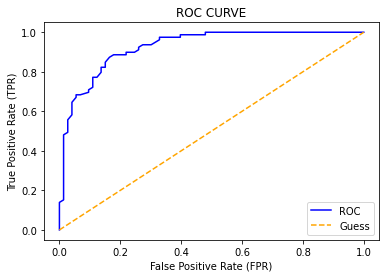

In [59]:
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color="blue", label="ROC")
    plt.plot([0, 1], [0, 1], color="orange", linestyle="--", label="Guess")
    plt.xlabel("False Positive Rate (FPR)")
    plt.ylabel("True Positive Rate (TPR)")
    plt.title("ROC CURVE")
    plt.legend()
    plt.show()
plot_roc_curve(fpr, tpr)    

In [60]:
# with the AUC score
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_probs_positive)

0.9263048378706433

# Using Confusion Matrix
##### used to compare the labels a model predicts and the actual label it was supposed to predict.
###### shows where the model is getting confused.

In [61]:
from sklearn.metrics import confusion_matrix
y_preds = clf.predict(X_test)
confusion_matrix(y_test, y_preds)

array([[61, 12],
       [10, 69]])

In [62]:
# confusion matrix viz 
pd.crosstab(y_test, y_preds, rownames=["True Labels"], colnames=["Predicted Labels"])

Predicted Labels,0,1
True Labels,,
0,61,12
1,10,69


In [63]:
## installing seaborn

import sys 
!conda install --yes --prefix {sys.prefix} seaborn

Solving environment: done

# All requested packages already installed.



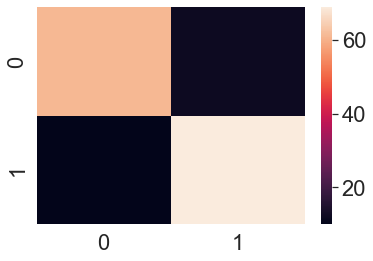

In [64]:
# further viz the confusion matrix using seaborn's heatmap

import seaborn as sns

sns.set(font_scale=2.0)
sns.heatmap(confusion_matrix(y_test, y_preds));

### Creating a confusion matrix batively on sklearn

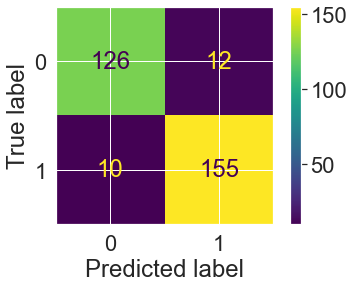

In [65]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X, y=y);

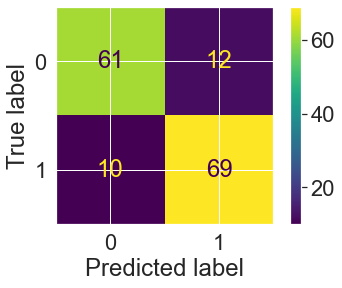

In [66]:
# another way
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_preds);

# Classification Report

#### Classification report is a collection of different evaluation metrics rather than a single one

In [67]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85        73
           1       0.85      0.87      0.86        79

    accuracy                           0.86       152
   macro avg       0.86      0.85      0.85       152
weighted avg       0.86      0.86      0.86       152



In [68]:
#### To verify if the models are balanced, example- 

disease_true = np.zeros(10000)

# Out of 10,000 samples, only one positive case
disease_true[0] = 1 
disease_preds = np.zeros(10000)
pd.DataFrame(classification_report(disease_true, disease_preds, output_dict=True))

/Users/hemanth/Desktop/sample_project/env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/hemanth/Desktop/sample_project/env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/hemanth/Desktop/sample_project/env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


# EVALUATION METRICS FOR REGRESSION MODEL

In [69]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
X = housing_df.drop("target", axis=1)
y = housing_df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8066196804802649

#### using R^2 score

In [70]:
from sklearn.metrics import r2_score

y_test_mean = np.full(len(y_test), y_test.mean())
y_test_mean

array([2.0550031, 2.0550031, 2.0550031, ..., 2.0550031, 2.0550031,
       2.0550031])

In [71]:
r2_score(y_true=y_test, y_pred=y_test_mean)

0.0

In [72]:
# mean_absolute_error

from sklearn.metrics import mean_absolute_error
y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

0.3265721842781009

In [75]:
# visualising the mean_absolute_error

df = pd.DataFrame(data={"actual values": y_test, "predicted values": y_preds})
df["differences"] = df["predicted values"] - df["actual values"]
df.head(15), np.abs(df["differences"]).mean()

(       actual values  predicted values  differences
 20046        0.47700          0.493840     0.016840
 3024         0.45800          0.754940     0.296940
 15663        5.00001          4.928596    -0.071414
 20484        2.18600          2.540290     0.354290
 9814         2.78000          2.331760    -0.448240
 13311        1.58700          1.654970     0.067970
 7113         1.98200          2.343230     0.361230
 7668         1.57500          1.661820     0.086820
 18246        3.40000          2.474890    -0.925110
 5723         4.46600          4.834478     0.368478
 20069        1.23200          1.177070    -0.054930
 6835         2.53900          2.086440    -0.452560
 11351        2.15100          1.582270    -0.568730
 20267        2.20500          1.794620    -0.410380
 7097         2.19800          2.478320     0.280320,
 0.32657218427810186)